# Сборный проект. Анализ компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Подготовка данных:

Импортируем библиотеки, изучаем таблицу

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt


In [2]:
games = pd.read_csv ('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head(5)
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


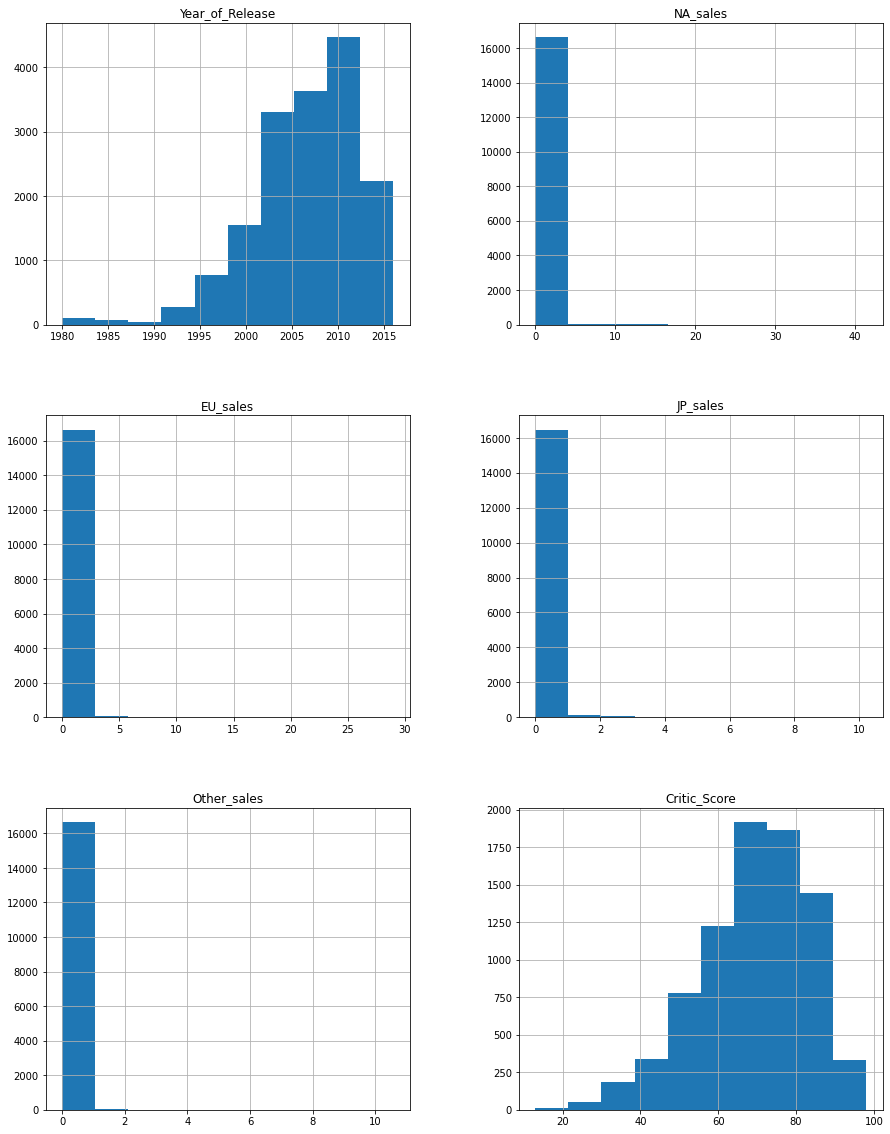

In [5]:
games.hist(figsize=(15, 20));

In [6]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Пропуски' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

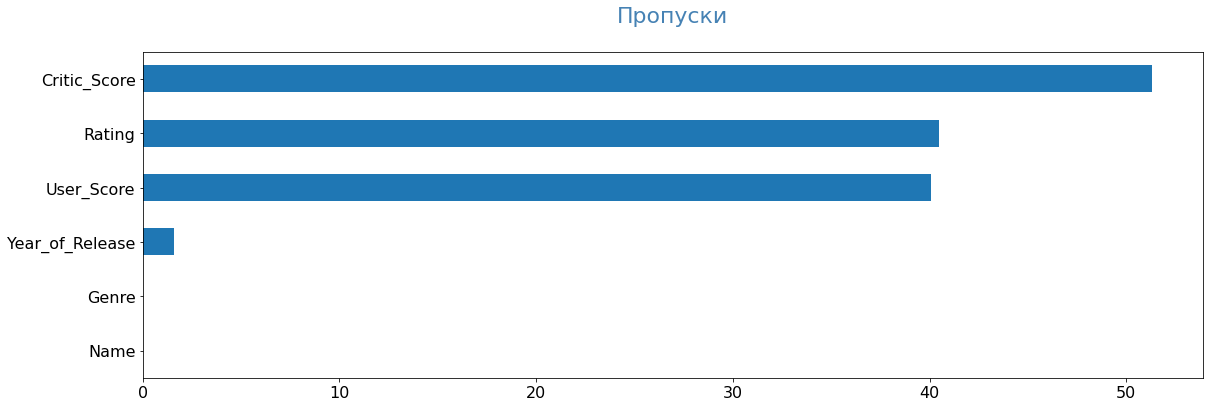

In [7]:
pass_value_barh(games)

In [8]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
games[games['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
games[games['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
games[games['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
games[games['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
games[games['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
games.duplicated().sum()

0

Большое количество данных пропущено в столбцах Critic_Score, Rating, User_score, будем с этим разбираться далее

In [15]:
# Приведем все столбцы к нижнему регистру
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [16]:
# Проведем очистку необходимую данных
games = games.dropna(subset=['name']).reset_index(drop=True)
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)
games['critic_score'] = games['critic_score'].fillna('-10')
# заменим значение "tbd" на NaN
games['user_score'] = games['user_score'].replace("tbd", np.NaN)
games['user_score'] = games['user_score'].fillna('-10')

In [17]:
# Приведем данные к соответсвующему типу
games['year_of_release'] = games['year_of_release'].astype('int64')
games['user_score'] = games['user_score'].astype('float')
games['critic_score'] = games['critic_score'].astype('int64')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [18]:
games['rating'] = games['rating'].fillna('no rating')

**Все необходимые преобразования были выполнены**

In [19]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-10,-10.0,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-10,-10.0,no rating,31.38


**Вывод:** Привели названия столбцов к нижнему регистру, удалили пропущенные данные в year_of_release и name, так как их меньше 10%, они не повлияют на качество данных, а также для изменения типов данных добавили значения "-10" (маркер) для оценок критиков и юзеров. TBD был заменен на Nan, так как это схожий для анализа показатель.

## Исследовательский анализ данных:

Посмотрим, сколько игр выпускались в каждый год

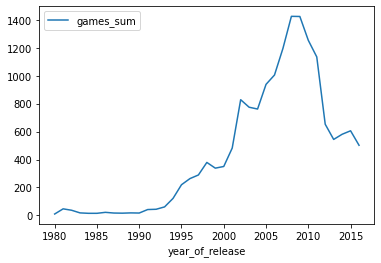

In [20]:
year_of_release_pivot_table = pd.pivot_table(games, index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot_table.columns = ['games_sum']
year_of_release_pivot_table.plot();

Большинство продаж игр пришлось на период после 2000 года, когда начался бум компьютерной техники, максимум приходится на 2008-2009 года. Таким образом, все периоды не важны для анализа.

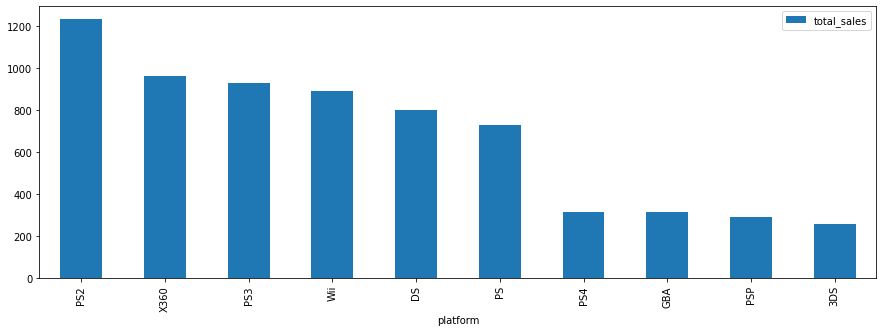

In [21]:
#выберем ТОП-10 игровых платформ
platform_sales_pivot_table = (games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False))
platform_sales_pivot_table_top = platform_sales_pivot_table.iloc[0:10]
platform_sales_pivot_table_top.plot(kind='bar', figsize=(15,5));

Наиболее популярной платформой является PS2, далее с небольшим отставанием идут XBOX360 и PS3

PS2


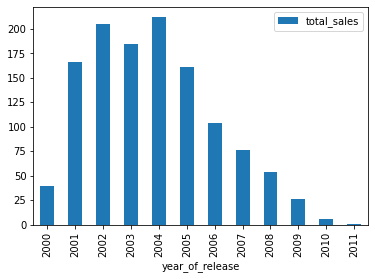

X360


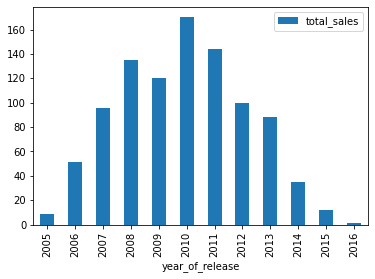

PS3


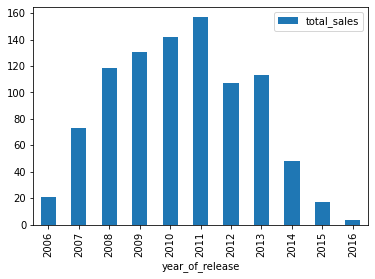

Wii


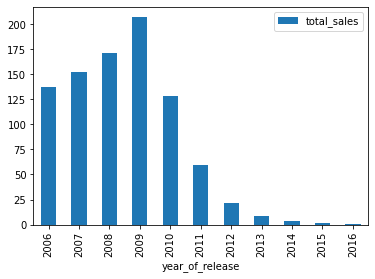

DS


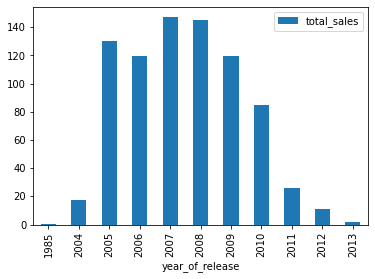

PS


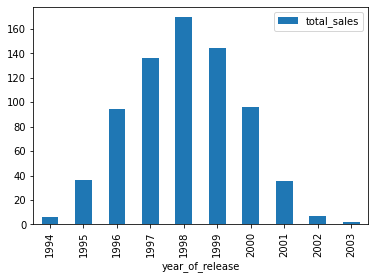

PS4


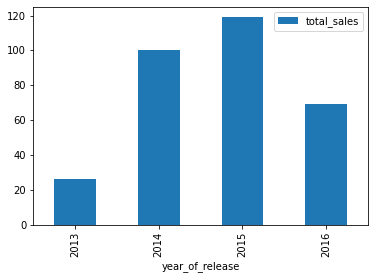

GBA


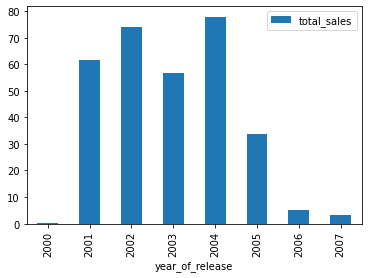

PSP


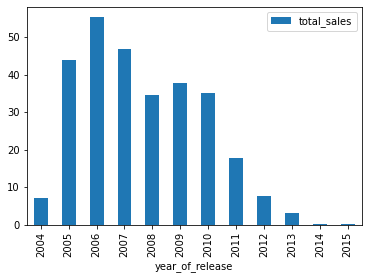

3DS


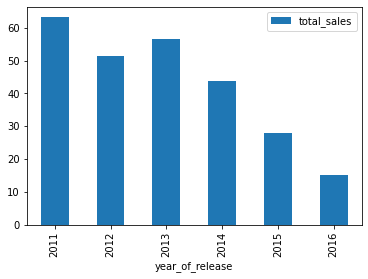

In [22]:
for platform in platform_sales_pivot_table_top.index[:10]:
    print(platform)
    (games.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar'))
    plt.show()

**Вывод:** По графикам видно, что среднее время жизни многих платформ составляет 10 лет.

Для решения следующей задачи необходимо взять период с 2005 года как актуальный (для прогноза возьмем 10-летний период + неполные данные за 2016 год)

In [23]:
analized_data = games.query('year_of_release >= 2013')
analized_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-10,-10.0,no rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-10,-10.0,no rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10,-10.0,no rating,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-10,-10.0,no rating,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-10,-10.0,no rating,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10,-10.0,no rating,0.01


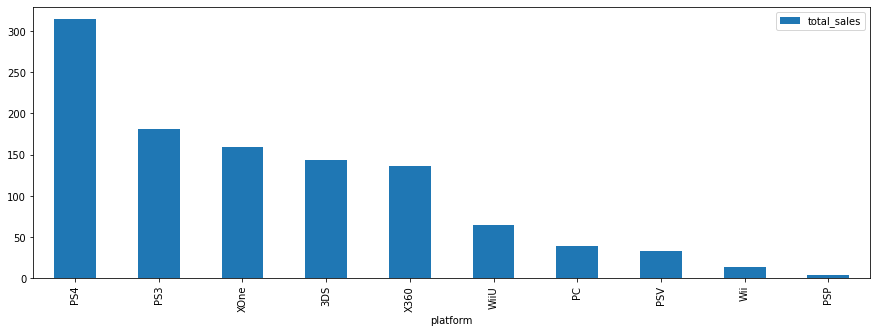

In [24]:
# ТОП-10 в выбранный период
platform_sales_new_pivot_table = (analized_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False))
platform_sales_new_pivot_table_top = platform_sales_new_pivot_table.iloc[0:10]
platform_sales_new_pivot_table_top.plot(kind='bar', figsize=(15,5));

PS4


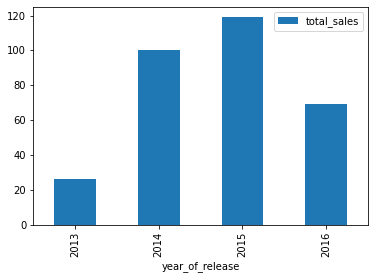

PS3


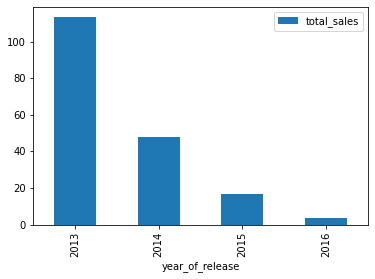

XOne


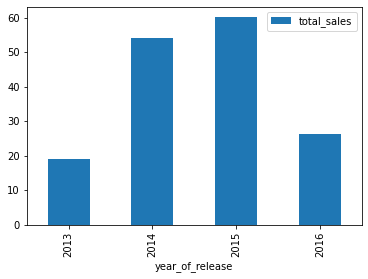

3DS


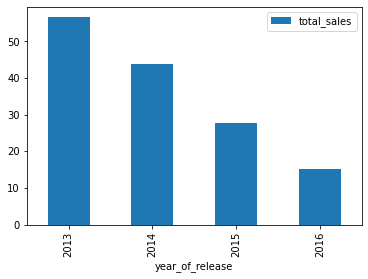

X360


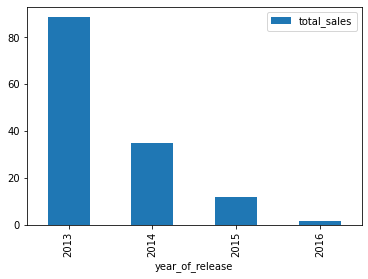

WiiU


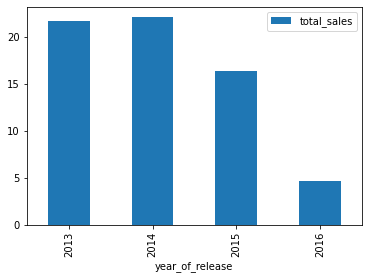

PC


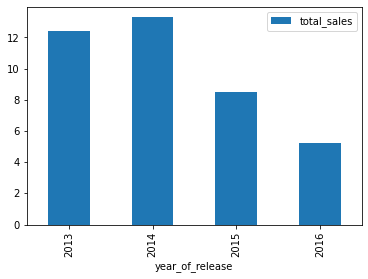

PSV


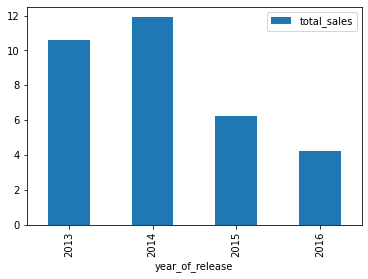

Wii


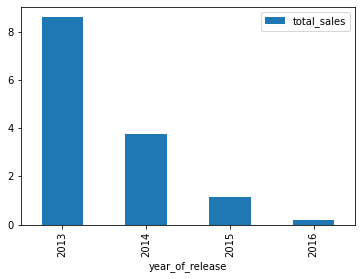

PSP


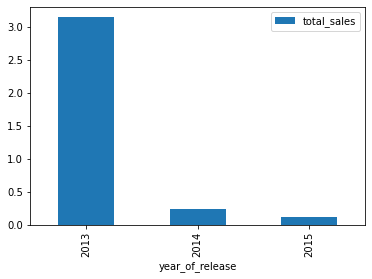

In [25]:
for platform in platform_sales_new_pivot_table_top.index[:10]:
    print(platform)
    (analized_data.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar'))
    plt.show()

Выделив период анализа, мы наблюдаем, что в лидеры по продажам вырываются более новые модели, которые являлись актуальными в разные периоды отмеченного временного интервала. Мы видим, что продажи  игр для Xbox и PS3 и Wii выросли, в то время как продажи игр для PS2 сущетсственно упали, так как она перестала быть лидером, что закономерно (появилась более новая модель Playstation). По графикам можно сделать выавод, что потенциально прибыльными можно назвать игры для  PS4 (новая модель), а также игры для РС как наиболее стабильный вариант, а также, если настроить маркетинг , то игры для Xone смогут выстрелить в 2017 году


В выбранный период наиболее популярными платформами являются PS4, PS3 и Xone. Продажи таких платформ как PS2, X360 существенно упали, так как период их актуальности либо закончился, либо подходит к концу. Новые модели, очевидно, выбиваются в лидеры по продажам в выбранный для анализа период. Перспективой на 2017 год можно назвать Xone, PC и PS4</b> 


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,26.401702,-1.146977,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,41.648354,8.358351,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,-10.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,-10.000000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,-10.000000,3.500000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,72.000000,7.100000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


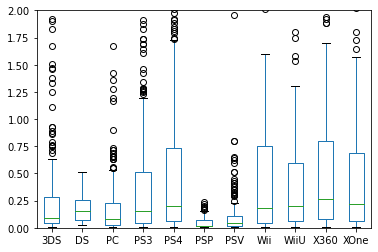

In [26]:
analized_data.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,2))
analized_data.describe()

По графику "Ящик с усами" видно, что у многих платформ есть игры, которые выстрелили (мы их видим на выбросах), медианные продажи также отличаются, но у многих платформ находятся на приблизительно одинаковом уровне.

В качестве популярной платформы возьмем PS4 и проанализируем ее с точки зрения влияния отзывов пользователей и критиков на продажи

0.12490454600214035

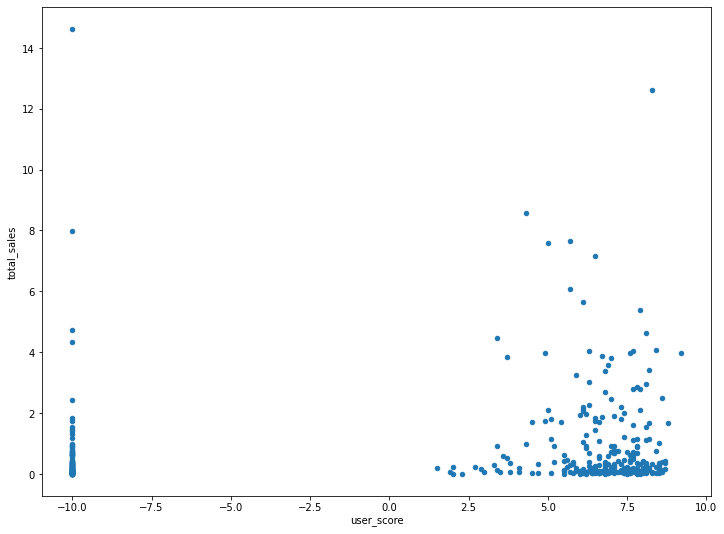

In [27]:
ps4 = analized_data.query('platform == "PS4"')
ps4.plot(x = 'user_score', y = 'total_sales', kind='scatter', figsize = (12,9))
ps4['user_score'].corr(ps4['total_sales'])

0.21825561124907264

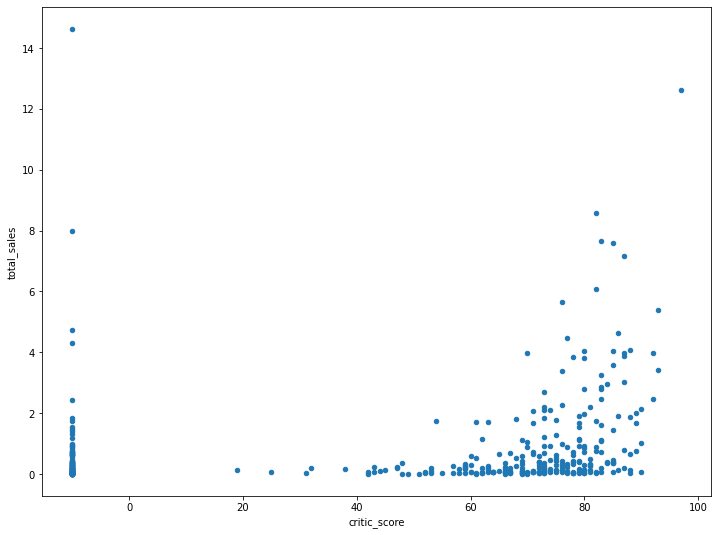

In [28]:
ps4 = analized_data.query('platform == "PS4"')
ps4.plot(x = 'critic_score', y = 'total_sales', kind='scatter', figsize = (12,9))
ps4['critic_score'].corr(ps4['total_sales'])

Возможно, PS4 не самый лучший пример влияния оценок критиков и игроков на продажи, но все же она есть и равна 12-21%, что не так много, далее сравним с другими платформами (возьмем 3-4 платформы разные)

In [29]:
pc = analized_data.query('platform == "PC"')
ps3 = analized_data.query('platform == "PS3"')
ds3 = analized_data.query('platform == "3DS"')

0.08188487938845665

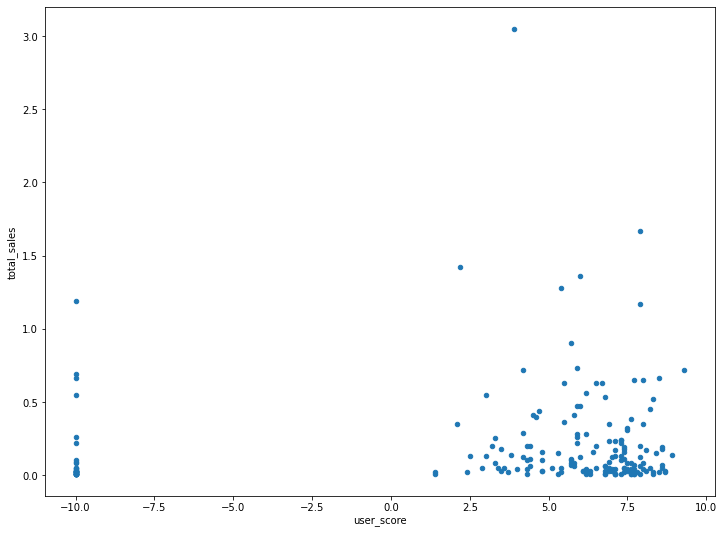

In [30]:
pc.plot(x = 'user_score', y = 'total_sales', kind='scatter', figsize = (12,9))
pc['user_score'].corr(pc['total_sales'])


0.1811531171741326

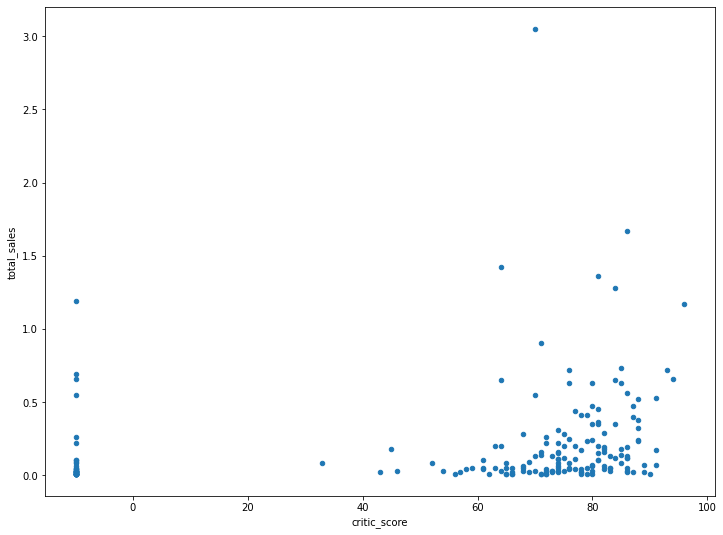

In [31]:
pc.plot(x = 'critic_score', y = 'total_sales', kind='scatter', figsize = (12,9))
pc['critic_score'].corr(pc['total_sales'])

0.21550103005886811

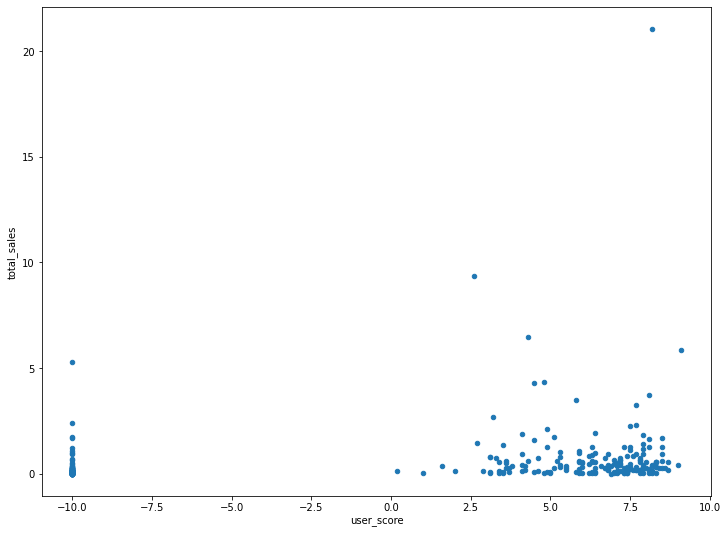

In [32]:
ps3.plot(x = 'user_score', y = 'total_sales', kind='scatter', figsize = (12,9))
ps3['user_score'].corr(ps3['total_sales'])

0.27190849844468085

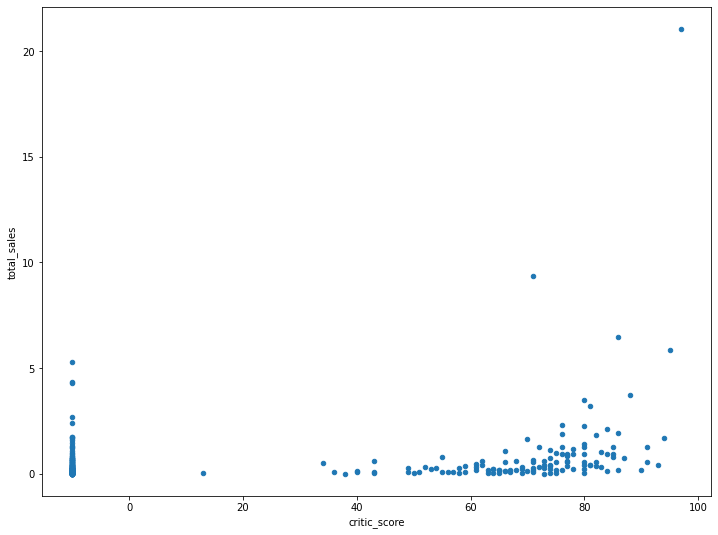

In [33]:
ps3.plot(x = 'critic_score', y = 'total_sales', kind='scatter', figsize = (12,9))
ps3['critic_score'].corr(ps3['total_sales'])

0.03729989511669204

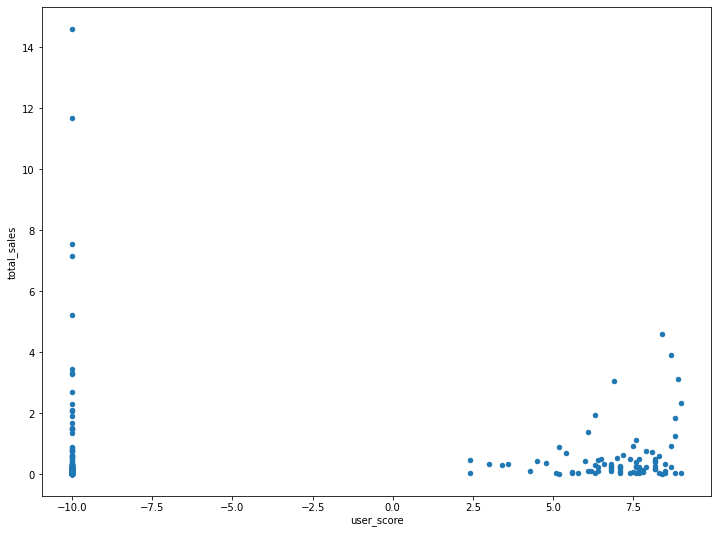

In [34]:
ds3.plot(x = 'user_score', y = 'total_sales', kind='scatter', figsize = (12,9))
ds3['user_score'].corr(ds3['total_sales'])

0.058387276051007166

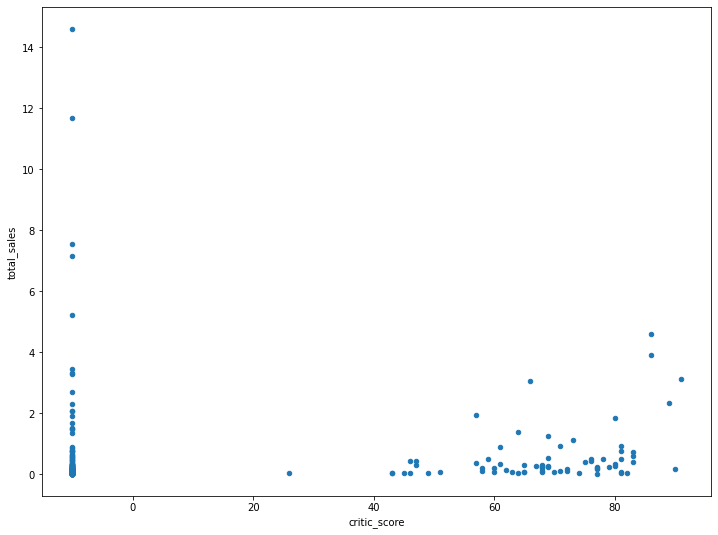

In [35]:
ds3.plot(x = 'critic_score', y = 'total_sales', kind='scatter', figsize = (12,9))
ds3['critic_score'].corr(ds3['total_sales'])

На других платформах наблюдается похожая картина, что и у PS4, следовательно, оценки пользователей и критиков не так сильно влияют на продажи игр.

In [36]:
genre_pivot_table = pd.pivot_table(analized_data, index='genre', values='total_sales', aggfunc='sum')
genre_pivot_table.sort_values('total_sales', ascending=False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Самыми прибыльными жанрами являются экш, шутеры и спорт, как наиболее увлекательные для пользователя. Данные игры способны подарить игроку много эмоций, они увлекательны, в них можно потратить много часов своей жизни. Наименее популярными являются игры "на подумать" - стратегии и паззлы, так как они быстро надоедают и в них необходимо еще и думать, а не отдыхать во время игры. 

**Вывод:** были проанализированы выпуск игр в разные года, а также их популярность игровых платформ, был выбран актуальный период анализа, а также в рамках актуального анализа проанализировали продажи игр на разных платформах, а также корреляцию отзывово пользователей и критиков с продажами игр на разных платформах.

## Портрет пользователя:

In [37]:
na_sales_new = analized_data.query('na_sales > 0')
eu_sales_new = analized_data.query('eu_sales > 0')
jp_sales_new = analized_data.query('jp_sales > 0')

In [38]:
sales_pivot_table = pd.pivot_table(na_sales_new , index='platform', values='na_sales', aggfunc='sum')
sales_pivot_table.sort_values('na_sales', ascending=False)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


In [39]:
sales_pivot_table = pd.pivot_table(eu_sales_new , index='platform', values='eu_sales', aggfunc='sum')
sales_pivot_table.sort_values('eu_sales', ascending=False)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


In [40]:
sales_pivot_table = pd.pivot_table(eu_sales_new , index='platform', values='jp_sales', aggfunc='sum')
sales_pivot_table.sort_values('jp_sales', ascending=False)

,jp_sales
platform,
3DS,36.08
PS3,13.84
PS4,11.90
WiiU,9.79
PSV,6.52
X360,0.47
XOne,0.33
PSP,0.14
DS,0.00


Северная Америка и Европа близки по ТОПу использования платформ, но все же отличия мы можем наблоюдать. Так в Европе и США лидирует PS4, однако на 2 месте в США - Xone (в Европе- PS3), на 3 месте в США - Х360 (в Европе - Xone). В Японии лидерами являются 3DS, PS3 и PS4.

In [41]:
genres_pivot_table = pd.pivot_table(na_sales_new , index='genre', values='na_sales', aggfunc='sum')
genres_pivot_table.sort_values('na_sales', ascending=False)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [42]:
genres_pivot_table = pd.pivot_table(eu_sales_new , index='genre', values='eu_sales', aggfunc='sum')
genres_pivot_table.sort_values('eu_sales', ascending=False)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [43]:
genres_pivot_table = pd.pivot_table(jp_sales_new , index='genre', values='jp_sales', aggfunc='sum')
genres_pivot_table.sort_values('jp_sales', ascending=False)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


По жанрам-лидерам Северная Америка и Европа абсолютно схожи, в них лидируют Action, Shooter  и Sports. В Японии иные жанры - Role-Plsying, Action и Misc.

In [44]:
esrb = analized_data.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
no rating,78.91,85.05,89.42


В поле рейтинг была добавлена "заглушка", мы видим, что у нас в данных очень много пропусков, что не позволяет объективно оценить влияние рейтинга ESRB на продажи в регионах. No rating может означать отсутсвие рейтинга, либо некорректность заполнения данных, при этом ее роль довольно велика. По тем данным, что у нас есть, можно сказать, в Европе и США в основном влияет рейтиг М, остальные рейтинги не сильно влияют на продажи, в Японии на рейтинг вообще не обращают внимание

**Выводы:** В данной разделе нами были проанализированы потребители видеоигр в 3 регионах мира. Так, потребители в Северной Америке и Европы довольно схожи по ТОПу использования игровых платформ, а также жанров и рейтингов. В Японии клиенты игр отличаются от европейцев и американцев как по игровым платформам, так и по жанрам, так и по использованию рейтинга ESRB при покупке игр.

## Проверка гипотез

 - Н0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 - Н1: средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [45]:
analized_data = analized_data[analized_data['user_score'] != -10]
analized_data = analized_data[analized_data['critic_score'] != -10]

In [46]:
print(analized_data.query('platform == "XOne"')['user_score'].mean())
print(analized_data.query('platform == "PC"')['user_score'].mean())
results = st.ttest_ind(
    analized_data.query('platform == "XOne"')['user_score'], 
    analized_data.query('platform == "PC"')['user_score'], 
    equal_var=False)
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

6.538181818181818
6.3020270270270276
p-значение: 0.17882648263401307
Не получилось отвергнуть нулевую гипотезу


 - Н0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
 - Н1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [47]:
print(analized_data.query('genre == "Action"')['user_score'].mean())
print(analized_data.query('genre == "Sports"')['user_score'].mean())

results = st.ttest_ind(
    analized_data.query('genre == "Action"')['user_score'], 
    analized_data.query('genre == "Sports"')['user_score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

6.9362459546925574
5.665454545454545
p-значение: 1.0496920005008588e-13
Отвергаем нулевую гипотезу


**Вывод:** по результатам двух тестов (Т-критерий Стьюдента в обоих случаях - так как сравнивали среднее в 2-ух выборках) при значимости в 95% в период с 2013 года делаем вывод, что средние пользовательские рейтинги платформ Xbox One и PC равны, а вот средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

## Выводы

Проект включал в себя следующие шаги и их результаты:

1. Просмотрена таблица, выявлены аномалии и пропущенные значения.
2. Проведена предобработка таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
3. Проведен исследовательский анализ данных
4. Составлены портреты пользователей для купных регионов продаж.
5. Выполнены проверки гипотез.

 - Резкий рост выпуска игр приходится на 2000 год, а пик на 2008-2009.
 - Срок жизни большиснтва платформ - 10 лет, однако для прогнозирования необходимо брать период в 2-3 года, что мы и сделали -  взяли период с 2013 года, включая неполные данные за 2016.
 - Потенциально прибыльные платформы - PS4, XOne, РС
 - Почти у всех платформ есть игры, которые были в топе у юзеров (хайпанули).
 - Оценки критиков и игроков очень слабо влияют на общие продажи
 - Больше всего игр жанра Action, Sports и Shooter
 - Северная Америка и Европа близки по вкусам к платформам и жанрам, Япония существенно отличается


 - Американец: чаще всего играет в PS4 и игры жанра Action
 - Европеец: чаще всего играет PS4  и игры в жанре Action
 - Японец: чаще всего играет 3DS  и игры в жанре Role-playing

 - Средние пользовательские оценки Xone и PC одинаковые
 - Средние пользовательские оценки Action и Sports разные